
################################################

Owner: Arnab Das

Dataset: MNIST, FMNIST

###############################################

### Task 3: Transfer Learning
> In this task, you will implement different strategies on doing transfer learning.
You will also investigate how well transfer learning is applicable to inputs of different data distributions.

#### 3.1 same distribution
> Split the MNIST dataset, such that 7 classes are the source domain and the other 3 classes are the target domain.
Start with the source domain data set and train a model on it.
From the trained model, cut off the final classification layer and replace it with a new layer for the target domain classes. For now, keep all layers trainable.
Now train this model on the target domain data set. For comparison, also train a freshly initialized model on the target domain data set.

How well did the transfer learning work, compared to training on the target data set from scratch?
You can e.g. compare:

* achieved accuracy
* steps until convergence
* generalization

## Index:
> ### Part I : Transfer Learning experiment - Same distribution
* Loading mnist dataset and dividing into domain based on class
* Defining base model
* Training on source domain
* Retraining on terget domain
* Training another model only on target domain 
* Comparing the training process and analysisng impact of transfer learning

> ### Part II: Transfer Learning experiment - Different distribution
* Training model of Mnist data set
* Loading fashion mnist dataset 
* Retraining the model on FMNIST dataset
* Training a fresh model only on FNIST dataset
* Comparing the training process and analysisng impact of transfer learning
* Performing same experiment starting with FMNIST data and retraining in MNIST data
* Comparing the training process and analysisng impact of transfer learning

> ### Part III: Comparing different  Transfer Learning Strategies
* Experiment with freezing pretrained layer and retraining.
* Analysing the strategy
* Freezing few bottom layers and retraining
* Analysing the strategy
* Adding few layer berfore retraining and then re-train
* Analysing the strategy
* Reinitialize few top layers and retraining
* Analysing the strategy

-x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x-


In [ ]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation, Conv2DTranspose, Input, AveragePooling2D, concatenate
from keras.regularizers import l2,l1_l2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

In [ ]:
train_images = train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255
test_images = test_images.reshape([-1, 28,28, 1]).astype(np.float32) / 255
train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

In [ ]:
# Printing the shape for trainining and testing dataset
print("Training images data shape is : {}".format(train_images.shape))
print("Training labels data shape is : {}".format(train_labels.shape))
print("Test images data shape is : {}".format(test_images.shape))
print("Test images data shape is : {}".format(test_labels.shape))

Training images data shape is : (60000, 28, 28, 1)
Training labels data shape is : (60000,)
Test images data shape is : (10000, 28, 28, 1)
Test images data shape is : (10000,)


In [ ]:
print("Training images data shape is : {}".format(train_images.shape))
print("Training labels data shape is : {}".format(train_labels.shape))
print("Test images data shape is : {}".format(test_images.shape))
print("Test images data shape is : {}".format(test_labels.shape))

Training images data shape is : (60000, 28, 28, 1)
Training labels data shape is : (60000,)
Test images data shape is : (10000, 28, 28, 1)
Test images data shape is : (10000,)


#### Source and taget domain segregation of the data set
> As part of the experiment classes from 0 to 6 will be in the source training and test dataset. And classes 7,8 and 9 will be in the target data set.

> As the target dataset is having only 3 classes we need to change the class label to 0, 1, 2 instead of 7,8,9 to be trained using sparse categorical cross entropy loss.

In [ ]:
bool_mask = train_labels  > 6
source_train_labels = [i for indx,i in enumerate(train_labels) if bool_mask[indx] == False]
target_train_labels = [i for indx,i in enumerate(train_labels) if bool_mask[indx] == True]
source_train_images = [i for indx,i in enumerate(train_images) if bool_mask[indx] == False]
target_train_images = [i for indx,i in enumerate(train_images) if bool_mask[indx] == True]

source_train_labels = np.asarray(source_train_labels)
target_train_labels = np.asarray(target_train_labels) - 7
source_train_images = np.asarray(source_train_images)
target_train_images = np.asarray(target_train_images)

In [ ]:
source_train_images = source_train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255
target_train_images = target_train_images.reshape([-1, 28,28, 1]).astype(np.float32) / 255
source_train_labels = source_train_labels.astype(np.int32)
target_train_labels = target_train_labels.astype(np.int32)

In [ ]:
test_bool_mask =  test_labels  > 6
source_test_labels = [i for indx,i in enumerate(test_labels) if test_bool_mask[indx] == False]
target_test_labels = [i for indx,i in enumerate(test_labels) if test_bool_mask[indx] == True]
source_test_images = [i for indx,i in enumerate(test_images) if test_bool_mask[indx] == False]
target_test_images = [i for indx,i in enumerate(test_images) if test_bool_mask[indx] == True]

source_test_labels = np.asarray(source_test_labels)
target_test_labels = np.asarray(target_test_labels) - 7
source_test_images = np.asarray(source_test_images)
target_test_images = np.asarray(target_test_images)

In [ ]:
# Printing the shape for source domain trainining and testing dataset
print("Source domain training images data shape is : {}".format(source_train_images.shape))
print("Source domain training labels data shape is : {}".format(source_train_labels.shape))
print("Target domain training images data shape is : {}".format(target_train_images.shape))
print("Target domain training images data shape is : {}".format(target_train_labels.shape))

Source domain training images data shape is : (41935, 28, 28, 1)
Source domain training labels data shape is : (41935,)
Target domain training images data shape is : (18065, 28, 28, 1)
Target domain training images data shape is : (18065,)


In [ ]:
# Printing the shape for target domain trainining and testing dataset
print("Source domain test images data shape is : {}".format(source_test_images.shape))
print("Source domain test labels data shape is : {}".format(source_test_labels.shape))
print("Target domain test images data shape is : {}".format(target_test_images.shape))
print("Target domain test images data shape is : {}".format(target_test_labels.shape))

Source domain test images data shape is : (6989, 28, 28, 1)
Source domain test labels data shape is : (6989,)
Target domain test images data shape is : (3011, 28, 28, 1)
Target domain test images data shape is : (3011,)


#### Defining a simple model with a combination of convolution layers and fully connected layers at the bottom.

In [ ]:
class MyModel(tf.keras.Model):

  def __init__(self, classNum):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(8, (3, 3), activation='relu', padding='valid')
    self.pool1= MaxPooling2D((2, 2), padding='valid')
    self.conv2 = Conv2D(16, (3, 3), activation='relu', padding='valid')
    self.pool2 = MaxPooling2D((2, 2), padding='same')
    self.conv3 = Conv2D(32, (3, 3), activation='relu', padding='valid')
    self.flat_1 = Flatten()
    self.fc_1 = Dense(256, activation='relu')
    self.fc_2 = Dense(128, activation='relu')
    self.fc_3 = Dense(64, activation='relu')
    self.classfier_source = Dense(classNum, activation='softmax')

  def call(self, inputs):
    x = self.conv1(inputs)
    x= self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.conv3(x)
    x = self.flat_1(x)
    x = self.fc_1(x)
    x = self.fc_2(x)
    x = self.fc_3(x)

    return self.classfier_source(x)

In [ ]:
#SourceModel = Model(imgInp, classfier_source)
SourceModel = MyModel(7)
SourceModel.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

source_train_history = SourceModel.fit(source_train_images, source_train_labels,
                epochs=10,
                batch_size=1024,
                shuffle=True, verbose=1)

Epoch 1/10
41/41 [==============================] - 1s 13ms/step - loss: 1.9283 - accuracy: 0.1916
Epoch 2/10
41/41 [==============================] - 0s 10ms/step - loss: 1.3720 - accuracy: 0.5570
Epoch 3/10
41/41 [==============================] - 0s 10ms/step - loss: 0.5755 - accuracy: 0.8040
Epoch 4/10
41/41 [==============================] - 0s 10ms/step - loss: 0.3954 - accuracy: 0.8720
Epoch 5/10
41/41 [==============================] - 0s 10ms/step - loss: 0.3190 - accuracy: 0.8991
Epoch 6/10
41/41 [==============================] - 0s 11ms/step - loss: 0.2716 - accuracy: 0.9150
Epoch 7/10
41/41 [==============================] - 0s 11ms/step - loss: 0.2450 - accuracy: 0.9225
Epoch 8/10
41/41 [==============================] - 0s 10ms/step - loss: 0.2227 - accuracy: 0.9303
Epoch 9/10
41/41 [==============================] - 0s 10ms/step - loss: 0.2042 - accuracy: 0.9355
Epoch 10/10
41/41 [==============================] - 0s 10ms/step - loss: 0.1884 - accuracy: 0.9398


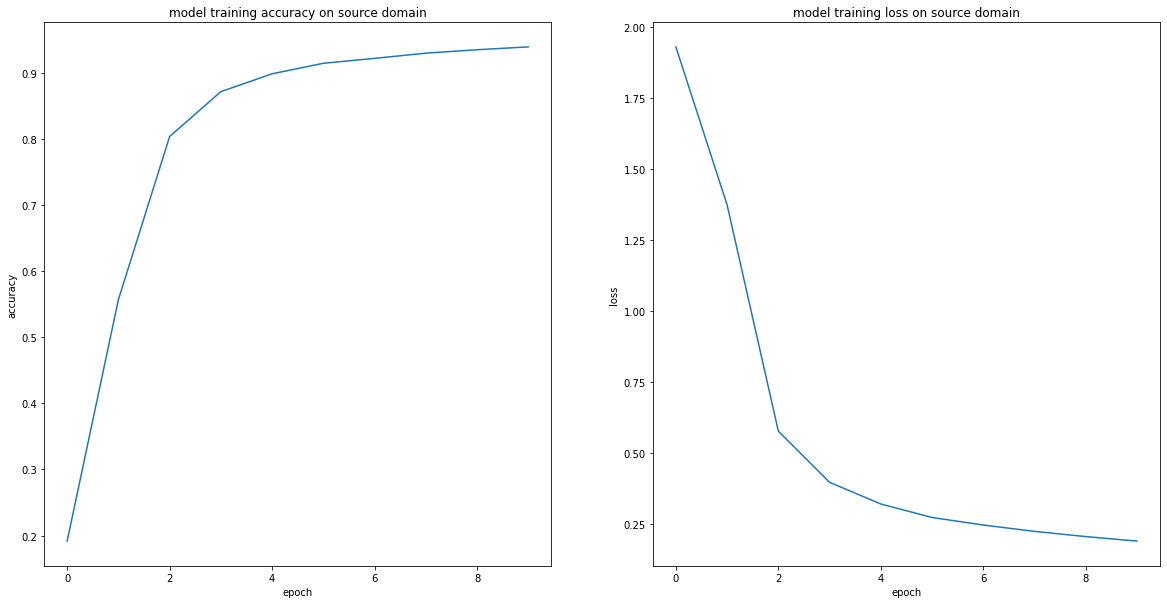

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(source_train_history.history['accuracy'])
plt.title('model training accuracy on source domain')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(source_train_history.history['loss'])
plt.title('model training loss on source domain')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
SourceModel.evaluate(source_test_images, source_test_labels, batch_size = 512,verbose = 2 )

14/14 - 0s - loss: 27.5141 - accuracy: 0.9011


[27.514055252075195, 0.9011303186416626]

##### Removing he classifier layer of 7 neurons at replacing it with a classifier layer of 3 neurons

In [ ]:
SourceModel._layers.pop()

In [ ]:
#base_SourceModel = Model(SourceModel.input, SourceModel.get_layer(index=12).output)
#classifier_target = Dense(3, activation='softmax')(base_SourceModel.output)
TargetModel = tf.keras.Sequential([
	            SourceModel,
	            tf.keras.layers.Dense(units=3, activation="softmax", name="classifier_target")
              ])

In [ ]:
TargetModel.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
target_train_history = TargetModel.fit(target_train_images, target_train_labels,
                epochs=20,
                batch_size=1024,
                shuffle=True, verbose=1)

Epoch 1/20
18/18 [==============================] - 0s 15ms/step - loss: 0.9839 - accuracy: 0.5291
Epoch 2/20
18/18 [==============================] - 0s 10ms/step - loss: 0.8608 - accuracy: 0.6133
Epoch 3/20
18/18 [==============================] - 0s 10ms/step - loss: 0.8148 - accuracy: 0.6302
Epoch 4/20
18/18 [==============================] - 0s 10ms/step - loss: 0.7851 - accuracy: 0.6390
Epoch 5/20
18/18 [==============================] - 0s 11ms/step - loss: 0.7570 - accuracy: 0.6440
Epoch 6/20
18/18 [==============================] - 0s 10ms/step - loss: 0.7300 - accuracy: 0.6506
Epoch 7/20
18/18 [==============================] - 0s 10ms/step - loss: 0.7058 - accuracy: 0.6531
Epoch 8/20
18/18 [==============================] - 0s 10ms/step - loss: 0.6823 - accuracy: 0.7744
Epoch 9/20
18/18 [==============================] - 0s 10ms/step - loss: 0.6591 - accuracy: 0.9405
Epoch 10/20
18/18 [==============================] - 0s 10ms/step - loss: 0.6402 - accuracy: 0.9469
Epoch 11/

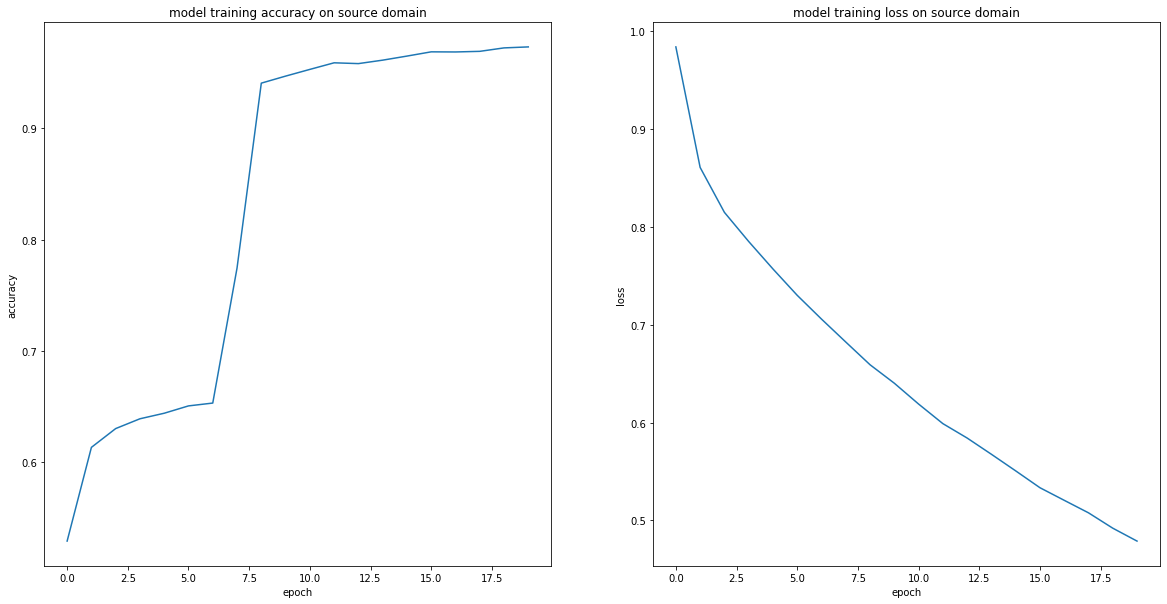

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(target_train_history.history['accuracy'])
plt.title('model training accuracy on source domain')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(target_train_history.history['loss'])
plt.title('model training loss on source domain')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
TargetModel.evaluate(target_test_images, target_test_labels, batch_size = 512,verbose = 2 )

6/6 - 0s - loss: 0.5199 - accuracy: 0.9382


[0.519915759563446, 0.9382265210151672]

In [ ]:
indv_model =  MyModel(3)
indv_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

individual_train_history = indv_model.fit(target_train_images, target_train_labels,
                epochs=20,
                batch_size=1024,
                shuffle=True, verbose=1)

Epoch 1/20
18/18 [==============================] - 0s 11ms/step - loss: 1.0980 - accuracy: 0.3532
Epoch 2/20
18/18 [==============================] - 0s 10ms/step - loss: 1.0910 - accuracy: 0.3835
Epoch 3/20
18/18 [==============================] - 0s 10ms/step - loss: 1.0004 - accuracy: 0.6936
Epoch 4/20
18/18 [==============================] - 0s 10ms/step - loss: 0.6793 - accuracy: 0.7530
Epoch 5/20
18/18 [==============================] - 0s 10ms/step - loss: 0.5166 - accuracy: 0.7935
Epoch 6/20
18/18 [==============================] - 0s 10ms/step - loss: 0.4342 - accuracy: 0.8269
Epoch 7/20
18/18 [==============================] - 0s 10ms/step - loss: 0.3633 - accuracy: 0.8585
Epoch 8/20
18/18 [==============================] - 0s 10ms/step - loss: 0.3054 - accuracy: 0.8848
Epoch 9/20
18/18 [==============================] - 0s 10ms/step - loss: 0.2585 - accuracy: 0.9037
Epoch 10/20
18/18 [==============================] - 0s 10ms/step - loss: 0.2277 - accuracy: 0.9175
Epoch 11/

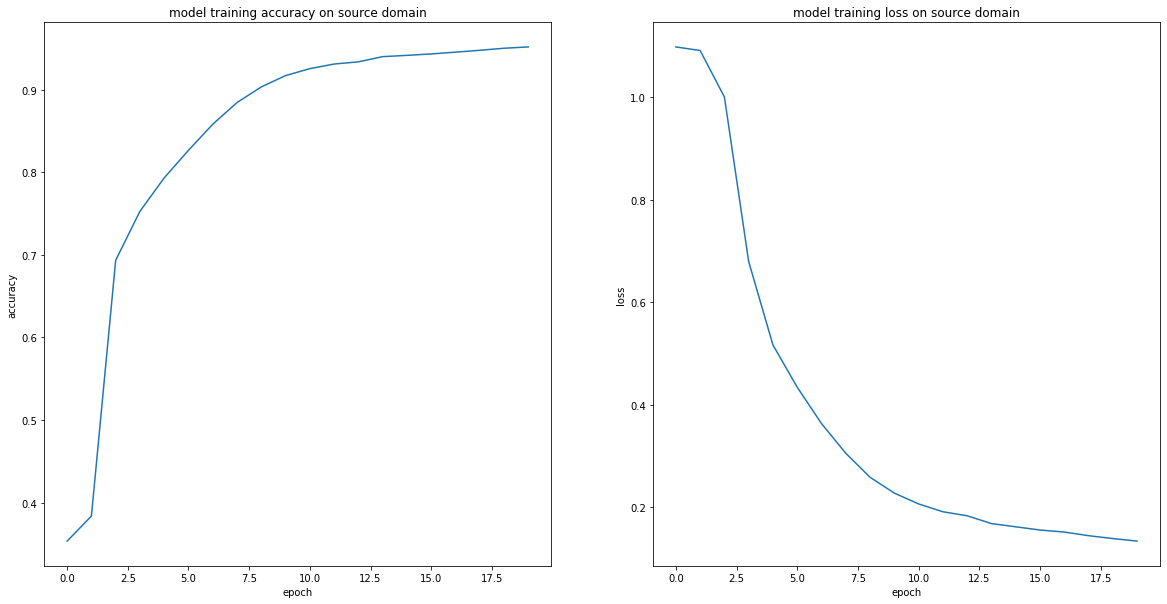

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(individual_train_history.history['accuracy'])
plt.title('model training accuracy on source domain')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(individual_train_history.history['loss'])
plt.title('model training loss on source domain')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
indv_model.evaluate(target_test_images, target_test_labels, batch_size = 512,verbose = 2 )

6/6 - 0s - loss: 40.5141 - accuracy: 0.8552


[40.51411056518555, 0.8551976084709167]

### Analysis and conclusion:

> As part of the experiment the model is first trained with source domain data set and then we only change the classifier layer and retrain the same with target domain data set.

> After this transfer learning training here here are few observations.

> 1. **Test Accuracy** :The model with `transfer learning is able to achieve a test accuracy of 93.8%` after the training, whereas a separate model with same architecture when entirely trainined from scratch only with target domain data, is `only able to achive around ~85.5% test accuracy` after the training, 
> 2. **Overfitting** : The final training accuracy of the scratch trained model is ~95.2%. i.e. the model is showing a `generalization error of *10%`. Whereas the model with transfer learning the highest traning accuracy is ~97.3%. That means the `generalization error is only ~3.5%`.
> 3. **Convergence** : With transfer learning the model crosses 94% training accuracy mark at `9th epoch` and then converges showing a slight increase in accuracy and the mark is distinct in the training graph. Whereas the model that scratch trained with target domain data, crosses the 94% mark at `14th epoch` and then converges.

> So **with transfer learning** technique we can get a **highly accurate**, **more general**, **less overfitted** model in comparison with traning without transfer learning. In addition models with transfer learning **converges fast** in less number of steps.

-----

### 3.2 different distribution
> Now we will work with MNIST as source domain and FMNIST as target domain. (This is convenient, as they already have the same input shape.)
Similar to 3.1, first train a model on the MNIST and use the pre-trained model as initialization for a model trained on FMNIST.
Compare this transfer learned model with a model trained on FMNIST from scratch using the measures from 3.1.

Repeat the experiment with FMNIST as source and MNIST as target!

Does transfer learning work better or worse this time?

### Task explanation:

> In this setting we will take the experiment with transfer learning a liitle bit further to test with data with different distribution. We will train a model in MNIST data set and then we will re-train the model with Fashion MNIST data. The we will compare its performace with a model that is only trained with FMNIST data. We will analyze the result. 

> In next step we will do this experiment in reverse order to see if the conclusion still holds.

In [ ]:
mnist_model =  MyModel(10)
mnist_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

mnist_train_history = mnist_model.fit(train_images, train_labels,
                epochs=10,
                batch_size=1024,
                shuffle=True, verbose=1)

Epoch 1/10
59/59 [==============================] - 1s 12ms/step - loss: 0.7672 - accuracy: 0.7965
Epoch 2/10
59/59 [==============================] - 1s 11ms/step - loss: 0.1936 - accuracy: 0.9428
Epoch 3/10
59/59 [==============================] - 1s 11ms/step - loss: 0.1254 - accuracy: 0.9623
Epoch 4/10
59/59 [==============================] - 1s 10ms/step - loss: 0.0910 - accuracy: 0.9727
Epoch 5/10
59/59 [==============================] - 1s 10ms/step - loss: 0.0741 - accuracy: 0.9776
Epoch 6/10
59/59 [==============================] - 1s 10ms/step - loss: 0.0618 - accuracy: 0.9811
Epoch 7/10
59/59 [==============================] - 1s 10ms/step - loss: 0.0576 - accuracy: 0.9826
Epoch 8/10
59/59 [==============================] - 1s 10ms/step - loss: 0.0495 - accuracy: 0.9843
Epoch 9/10
59/59 [==============================] - 1s 10ms/step - loss: 0.0441 - accuracy: 0.9867
Epoch 10/10
59/59 [==============================] - 1s 10ms/step - loss: 0.0410 - accuracy: 0.9871


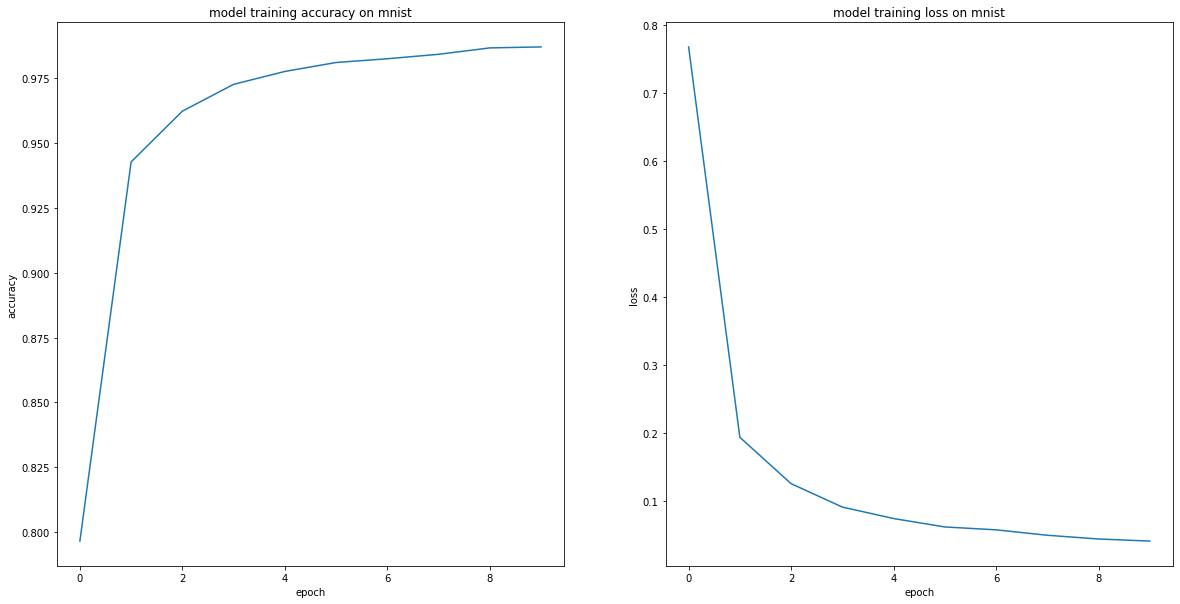

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(mnist_train_history.history['accuracy'])
plt.title('model training accuracy on mnist')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(mnist_train_history.history['loss'])
plt.title('model training loss on mnist')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
mnist_model.evaluate(test_images, test_labels, batch_size = 1024,verbose = 2 )

10/10 - 0s - loss: 0.0412 - accuracy: 0.9862


[0.041225556284189224, 0.9861999750137329]

In [ ]:
mnistf_dataset = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnistf_dataset.load_data()

In [ ]:
x_train = x_train.reshape([-1, 28, 28, 1]).astype(np.float32) / 255
x_test = x_test.reshape([-1, 28,28, 1]).astype(np.float32) / 255
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [ ]:
# Printing the shape for trainining and testing dataset
print("Training images data shape is : {}".format(x_train.shape))
print("Training labels data shape is : {}".format(y_train.shape))
print("Test images data shape is : {}".format(x_test.shape))
print("Test images data shape is : {}".format(y_test.shape))

Training images data shape is : (60000, 28, 28, 1)
Training labels data shape is : (60000,)
Test images data shape is : (10000, 28, 28, 1)
Test images data shape is : (10000,)


In [ ]:
transfer_Model = tf.keras.Sequential([
	            mnist_model
              ])

In [ ]:
transfer_Model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

trans_train_history = transfer_Model.fit(x_train, y_train,
                epochs=20,
                batch_size=1024,
                shuffle=True, verbose=1)

Epoch 1/20
59/59 [==============================] - 1s 10ms/step - loss: 1.0550 - accuracy: 0.6460
Epoch 2/20
59/59 [==============================] - 1s 10ms/step - loss: 0.5428 - accuracy: 0.8019
Epoch 3/20
59/59 [==============================] - 1s 10ms/step - loss: 0.4695 - accuracy: 0.8284
Epoch 4/20
59/59 [==============================] - 1s 10ms/step - loss: 0.4216 - accuracy: 0.8486
Epoch 5/20
59/59 [==============================] - 1s 10ms/step - loss: 0.3894 - accuracy: 0.8591
Epoch 6/20
59/59 [==============================] - 1s 10ms/step - loss: 0.3661 - accuracy: 0.8678
Epoch 7/20
59/59 [==============================] - 1s 10ms/step - loss: 0.3567 - accuracy: 0.8689
Epoch 8/20
59/59 [==============================] - 1s 10ms/step - loss: 0.3289 - accuracy: 0.8804
Epoch 9/20
59/59 [==============================] - 1s 10ms/step - loss: 0.3152 - accuracy: 0.8852
Epoch 10/20
59/59 [==============================] - 1s 10ms/step - loss: 0.3117 - accuracy: 0.8867
Epoch 11/

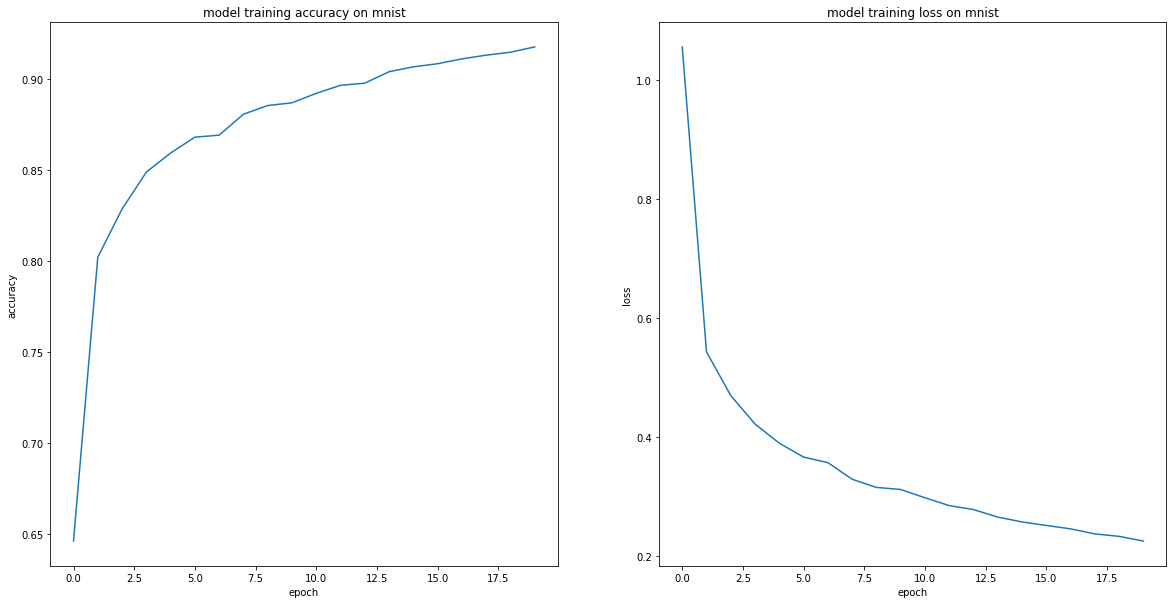

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(trans_train_history.history['accuracy'])
plt.title('model training accuracy on mnist')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(trans_train_history.history['loss'])
plt.title('model training loss on mnist')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
transfer_Model.evaluate(x_test, y_test, batch_size = 1024,verbose = 2 )

10/10 - 0s - loss: 0.2903 - accuracy: 0.8967


[0.2902824282646179, 0.8967000246047974]

> After retraning the model on fashion Mnist data set the model achieves a **traning accuracy of ~91.7% and the testing accuracy is ~89.7%**. This produces a very low **generalization gap of 2%**. If we consider this as the measure of overfitting, then the model is well generalised for the unseen data as the test accuracy closely tracks the trainng accuracy. Also the model takes **11 epochs** to reach a level of 89% accuracy and then converges

In [ ]:
fashion_mnist_model =  MyModel(10)
fashion_mnist_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

fashion_mnist_train_history = fashion_mnist_model.fit(x_train,y_train,
                epochs=20,
                batch_size=1024,
                shuffle=True, verbose=1)

Epoch 1/20
59/59 [==============================] - 1s 11ms/step - loss: 1.0374 - accuracy: 0.6317
Epoch 2/20
59/59 [==============================] - 1s 11ms/step - loss: 0.6065 - accuracy: 0.7652
Epoch 3/20
59/59 [==============================] - 1s 11ms/step - loss: 0.5251 - accuracy: 0.7997
Epoch 4/20
59/59 [==============================] - 1s 11ms/step - loss: 0.4679 - accuracy: 0.8282
Epoch 5/20
59/59 [==============================] - 1s 10ms/step - loss: 0.4301 - accuracy: 0.8438
Epoch 6/20
59/59 [==============================] - 1s 10ms/step - loss: 0.4044 - accuracy: 0.8550
Epoch 7/20
59/59 [==============================] - 1s 10ms/step - loss: 0.3826 - accuracy: 0.8611
Epoch 8/20
59/59 [==============================] - 1s 10ms/step - loss: 0.3637 - accuracy: 0.8685
Epoch 9/20
59/59 [==============================] - 1s 11ms/step - loss: 0.3505 - accuracy: 0.8730
Epoch 10/20
59/59 [==============================] - 1s 10ms/step - loss: 0.3417 - accuracy: 0.8767
Epoch 11/

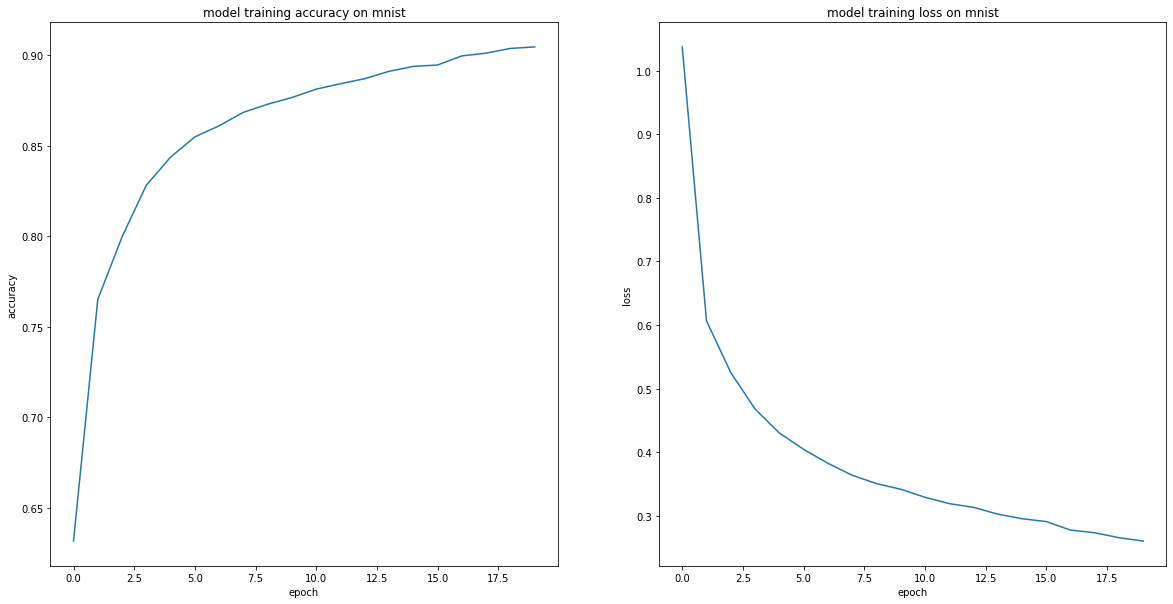

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(fashion_mnist_train_history.history['accuracy'])
plt.title('model training accuracy on mnist')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(fashion_mnist_train_history.history['loss'])
plt.title('model training loss on mnist')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
fashion_mnist_model.evaluate(x_test, y_test, batch_size = 1024,verbose = 2 )

10/10 - 0s - loss: 0.3088 - accuracy: 0.8875


[0.3087849020957947, 0.887499988079071]

> The model trained only wth fashion mnist data is able to achive **test accuracy of ~88.7%**, which is less compared to previous case. Although in terms of overfitting both the models perform similarly but this model takes **14 epoch** to reach 89% training accuracy. So this model converges slow.  



---



#### Will this behavior be same if we do it in reverse way?

In [ ]:
fashion_model =  MyModel(10)
fashion_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

fashion_train_history = fashion_model.fit(x_train,y_train,
                epochs=10,
                batch_size=1024,
                shuffle=True, verbose=1)

Epoch 1/10
59/59 [==============================] - 1s 10ms/step - loss: 1.1612 - accuracy: 0.5866
Epoch 2/10
59/59 [==============================] - 1s 10ms/step - loss: 0.6204 - accuracy: 0.7592
Epoch 3/10
59/59 [==============================] - 1s 11ms/step - loss: 0.5290 - accuracy: 0.7972
Epoch 4/10
59/59 [==============================] - 1s 11ms/step - loss: 0.4612 - accuracy: 0.8289
Epoch 5/10
59/59 [==============================] - 1s 11ms/step - loss: 0.4228 - accuracy: 0.8446
Epoch 6/10
59/59 [==============================] - 1s 10ms/step - loss: 0.3930 - accuracy: 0.8573
Epoch 7/10
59/59 [==============================] - 1s 10ms/step - loss: 0.3719 - accuracy: 0.8665
Epoch 8/10
59/59 [==============================] - 1s 11ms/step - loss: 0.3521 - accuracy: 0.8735
Epoch 9/10
59/59 [==============================] - 1s 10ms/step - loss: 0.3385 - accuracy: 0.8778
Epoch 10/10
59/59 [==============================] - 1s 10ms/step - loss: 0.3327 - accuracy: 0.8803


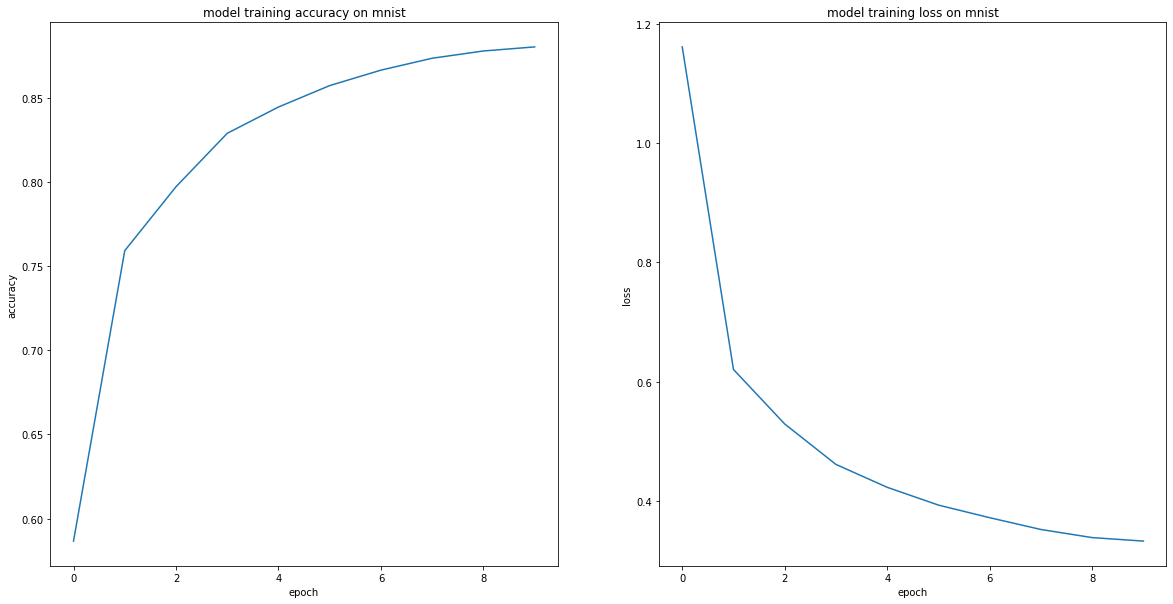

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(fashion_train_history.history['accuracy'])
plt.title('model training accuracy on mnist')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(fashion_train_history.history['loss'])
plt.title('model training loss on mnist')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
fashion_model.evaluate(x_test, y_test, batch_size = 1024,verbose = 2 )

10/10 - 0s - loss: 0.3530 - accuracy: 0.8695


[0.35304954648017883, 0.8694999814033508]

In [ ]:
transfer_mnist_Model = tf.keras.Sequential([
	            fashion_model
              ])

In [ ]:
transfer_mnist_Model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

trans_mnist_train_history = transfer_mnist_Model.fit(train_images, train_labels,
                epochs=20,
                batch_size=1024,
                shuffle=True, verbose=1)

Epoch 1/20
59/59 [==============================] - 1s 10ms/step - loss: 1.4062 - accuracy: 0.6094
Epoch 2/20
59/59 [==============================] - 1s 11ms/step - loss: 0.2426 - accuracy: 0.9255
Epoch 3/20
59/59 [==============================] - 1s 11ms/step - loss: 0.1567 - accuracy: 0.9512
Epoch 4/20
59/59 [==============================] - 1s 11ms/step - loss: 0.1235 - accuracy: 0.9622
Epoch 5/20
59/59 [==============================] - 1s 11ms/step - loss: 0.1064 - accuracy: 0.9669
Epoch 6/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0921 - accuracy: 0.9713
Epoch 7/20
59/59 [==============================] - 1s 11ms/step - loss: 0.0803 - accuracy: 0.9752
Epoch 8/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0707 - accuracy: 0.9777
Epoch 9/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0649 - accuracy: 0.9801
Epoch 10/20
59/59 [==============================] - 1s 11ms/step - loss: 0.0583 - accuracy: 0.9816
Epoch 11/

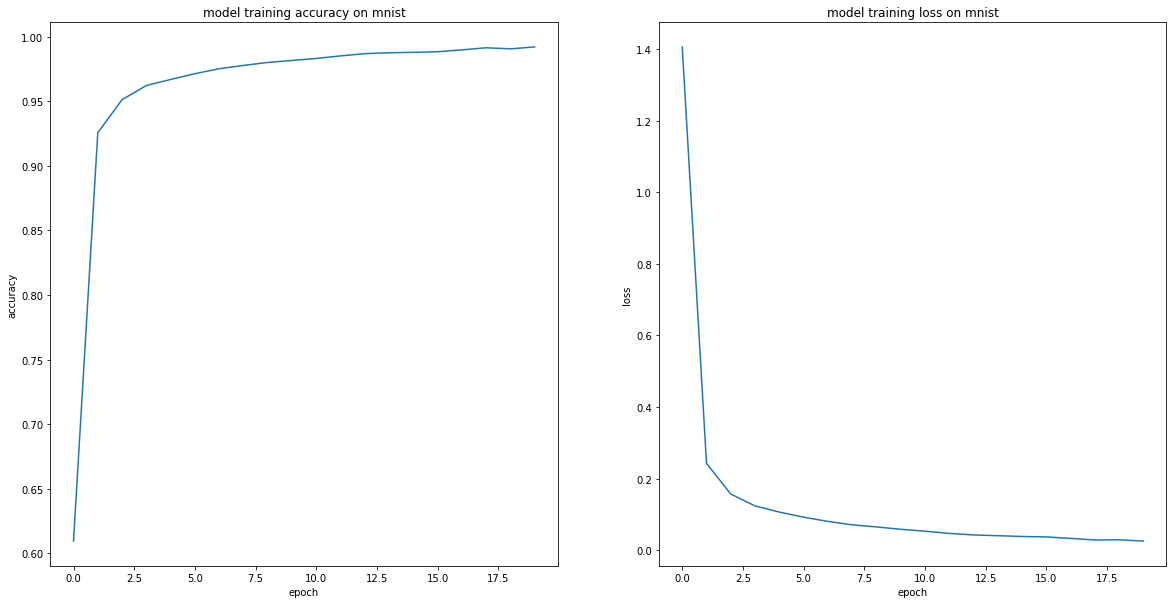

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(trans_mnist_train_history.history['accuracy'])
plt.title('model training accuracy on mnist')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(trans_mnist_train_history.history['loss'])
plt.title('model training loss on mnist')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
transfer_mnist_Model.evaluate(test_images, test_labels, batch_size = 1024,verbose = 2 )

10/10 - 0s - loss: 0.0368 - accuracy: 0.9886


[0.03680172562599182, 0.9886000156402588]

> * Here the model is first trained with more complex fashion Mnist data. And then the same mode is trained with simpler mnist dataset.
> * This model with transdfer learning achives 99.2% traning accuracy and  ~98.9% training accuracy.
> * The generalization gap is very narrow ~0.3%
> * Also the model converges very fast only after 2 epochs. 

In [ ]:
pure_mnist_model =  MyModel(10)
pure_mnist_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

pure_mnist_train_history = pure_mnist_model.fit(train_images, train_labels,
                epochs=20,
                batch_size=1024,
                shuffle=True, verbose=1)

Epoch 1/20
59/59 [==============================] - 1s 11ms/step - loss: 0.8809 - accuracy: 0.7532
Epoch 2/20
59/59 [==============================] - 1s 11ms/step - loss: 0.1910 - accuracy: 0.9417
Epoch 3/20
59/59 [==============================] - 1s 11ms/step - loss: 0.1198 - accuracy: 0.9630
Epoch 4/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0895 - accuracy: 0.9725
Epoch 5/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0757 - accuracy: 0.9763
Epoch 6/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0649 - accuracy: 0.9798
Epoch 7/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0550 - accuracy: 0.9830
Epoch 8/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0510 - accuracy: 0.9841
Epoch 9/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0449 - accuracy: 0.9858
Epoch 10/20
59/59 [==============================] - 1s 10ms/step - loss: 0.0397 - accuracy: 0.9876
Epoch 11/

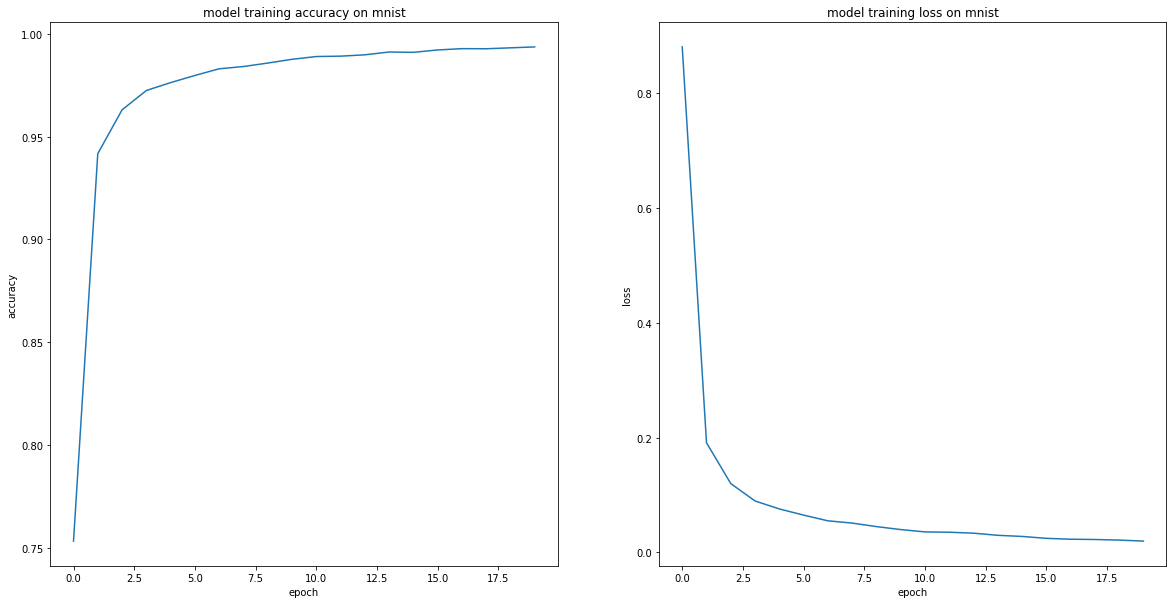

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(pure_mnist_train_history.history['accuracy'])
plt.title('model training accuracy on mnist')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(pure_mnist_train_history.history['loss'])
plt.title('model training loss on mnist')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
pure_mnist_model.evaluate(test_images, test_labels, batch_size = 1024,verbose = 2 )

10/10 - 0s - loss: 0.0347 - accuracy: 0.9898


[0.03470283001661301, 0.989799976348877]

> * The model with same architecture when trained only with mnist data, achieves a training accuracy of ~99.4% and test accuracy of ~99%.
> * This model also converges after 2 epochs.

### conclusion

> As the mnist data is very simple, both the model performs similarly. The model with transfer learning works at per with the model trained from scratch only with mnist data.



---



#### 3.3 Compare diffferent ways to do the transfer learning
> Transfer learning is done with different strategies.
You can for example investigate:

* freezing all pre-trained layers (i.e. set trainable to False)
* freezing only some bottom layers
* replacing (or reinitializing) multiple top layers
* replacing the source classification layer by multiple new ones for the target domain. 
This is particularly meaningful, if the target domain is more complex than the source domain.

Do you observe any differences in the final result using different ways of going from target to source?

> In this experiment we will perform training and tests of different models to find out which strategy works best .

### Strategy 1:
* We first train our model with source domain mnist data of 7 classes.
* Then we freeze the pre trained model layers except the final classifier layer.
* We change the classifier layer and retrain the model on target domain data.
* Then we anlyze the training.

In [ ]:
base_Model = MyModel(7)
base_Model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = base_Model.fit(source_train_images, source_train_labels,
                epochs=10,
                batch_size=1024,
                shuffle=True, verbose=1)

Epoch 1/10
41/41 [==============================] - 0s 10ms/step - loss: 1.9436 - accuracy: 0.1593
Epoch 2/10
41/41 [==============================] - 0s 10ms/step - loss: 1.8047 - accuracy: 0.2583
Epoch 3/10
41/41 [==============================] - 0s 10ms/step - loss: 1.3771 - accuracy: 0.4582
Epoch 4/10
41/41 [==============================] - 0s 10ms/step - loss: 1.0450 - accuracy: 0.6502
Epoch 5/10
41/41 [==============================] - 0s 11ms/step - loss: 0.5838 - accuracy: 0.8081
Epoch 6/10
41/41 [==============================] - 0s 10ms/step - loss: 0.3853 - accuracy: 0.8739
Epoch 7/10
41/41 [==============================] - 0s 10ms/step - loss: 0.3122 - accuracy: 0.8996
Epoch 8/10
41/41 [==============================] - 0s 10ms/step - loss: 0.2706 - accuracy: 0.9150
Epoch 9/10
41/41 [==============================] - 0s 10ms/step - loss: 0.2349 - accuracy: 0.9259
Epoch 10/10
41/41 [==============================] - 0s 10ms/step - loss: 0.2104 - accuracy: 0.9349


In [ ]:
base_Model._layers.pop()

In [ ]:
Strategy1_Model = tf.keras.Sequential([
	            base_Model,
	            tf.keras.layers.Dense(units=3, activation="softmax", name="classifier_target")
              ])

In [ ]:
for layer in Strategy1_Model.layers[:-1]:
  layer.trainable = False

In [ ]:
Strategy1_Model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history = Strategy1_Model.fit(target_train_images, target_train_labels,
                epochs=20,
                batch_size=1024,
                shuffle=True, verbose=1)

Epoch 1/20
18/18 [==============================] - 0s 5ms/step - loss: 1.0992 - accuracy: 0.2767
Epoch 2/20
18/18 [==============================] - 0s 5ms/step - loss: 1.0865 - accuracy: 0.2922
Epoch 3/20
18/18 [==============================] - 0s 5ms/step - loss: 1.0743 - accuracy: 0.3155
Epoch 4/20
18/18 [==============================] - 0s 5ms/step - loss: 1.0628 - accuracy: 0.3477
Epoch 5/20
18/18 [==============================] - 0s 5ms/step - loss: 1.0520 - accuracy: 0.3785
Epoch 6/20
18/18 [==============================] - 0s 5ms/step - loss: 1.0417 - accuracy: 0.3894
Epoch 7/20
18/18 [==============================] - 0s 5ms/step - loss: 1.0321 - accuracy: 0.3997
Epoch 8/20
18/18 [==============================] - 0s 6ms/step - loss: 1.0228 - accuracy: 0.5418
Epoch 9/20
18/18 [==============================] - 0s 6ms/step - loss: 1.0141 - accuracy: 0.5846
Epoch 10/20
18/18 [==============================] - 0s 5ms/step - loss: 1.0057 - accuracy: 0.5920
Epoch 11/20
18/18 [

In [ ]:
Strategy1_Model.evaluate(target_test_images,target_test_labels,batch_size=1024,verbose=2)

3/3 - 0s - loss: 0.9632 - accuracy: 0.5493


[0.9632360935211182, 0.5493191480636597]

#### Analysis:
> Using this strategy, after retraining the model could only reach training accuracy of 65% whereas the testing accuracy remains as low as ~55%. That means the model is underfitted and also there is almost 10% generalization error gap.

> So this strategy is not that effective.

---

### Strategy 2:
* We first train our model with source domain mnist data of 7 classes.
* Then we freeze only few bottom pre trained layers. (Here only fully connected layers.
* We change the classifier layer and retrain the model on target domain data.
Then we anlyze the training.

In [ ]:
base_Model_2 = MyModel(7)
base_Model_2.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = base_Model_2.fit(source_train_images, source_train_labels,
                epochs=10,
                batch_size=1024,
                shuffle=True, verbose=0)
base_Model_2._layers.pop()

In [ ]:
for layer in base_Model_2.layers[6:]:
  layer.trainable = False

In [ ]:
Strategy2_Model = tf.keras.Sequential([
	            base_Model_2,
	            tf.keras.layers.Dense(units=3, activation="softmax", name="classifier_target")
              ])
Strategy2_Model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history = Strategy2_Model.fit(target_train_images, target_train_labels,
                epochs=20,
                batch_size=1024,
                shuffle=True, verbose=1)

Epoch 1/20
18/18 [==============================] - 0s 10ms/step - loss: 1.0470 - accuracy: 0.5624
Epoch 2/20
18/18 [==============================] - 0s 10ms/step - loss: 0.9866 - accuracy: 0.6976
Epoch 3/20
18/18 [==============================] - 0s 10ms/step - loss: 0.9459 - accuracy: 0.7614
Epoch 4/20
18/18 [==============================] - 0s 10ms/step - loss: 0.9122 - accuracy: 0.7858
Epoch 5/20
18/18 [==============================] - 0s 10ms/step - loss: 0.8849 - accuracy: 0.8019
Epoch 6/20
18/18 [==============================] - 0s 10ms/step - loss: 0.8601 - accuracy: 0.8147
Epoch 7/20
18/18 [==============================] - 0s 10ms/step - loss: 0.8372 - accuracy: 0.8255
Epoch 8/20
18/18 [==============================] - 0s 10ms/step - loss: 0.8149 - accuracy: 0.8368
Epoch 9/20
18/18 [==============================] - 0s 10ms/step - loss: 0.7931 - accuracy: 0.8477
Epoch 10/20
18/18 [==============================] - 0s 10ms/step - loss: 0.7710 - accuracy: 0.8587
Epoch 11/

In [ ]:
Strategy2_Model.evaluate(target_test_images,target_test_labels,batch_size=1024,verbose=2)

3/3 - 0s - loss: 0.6154 - accuracy: 0.8884


[0.6154207587242126, 0.8884091377258301]

### Analysis:
> After re-training the model could achieve ~91% training accuracy and 88.84% testing accuracy. In terms of overfitting this approach shows a generalization error margin of ~2.5%, which is not very bad. But considering that the dataset is not that complex. The overall accuracy is a bit low.

---

### Strategy 3:
* We first train our model with source domain mnist data of 7 classes.
* Then we remove the classification layer and instead we add few more dense layer at the bottom.
* We also add the 3 neuron classifier layer and retrain the model on target domain data.
Then we anlyze the training.

In [ ]:
base_Model_3 = MyModel(7)
base_Model_3.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = base_Model_3.fit(source_train_images, source_train_labels,
                epochs=10,
                batch_size=1024,
                shuffle=True, verbose=0)
base_Model_3._layers.pop()
Strategy3_Model = tf.keras.Sequential([
	            base_Model_3,
	            tf.keras.layers.Dense(units=32, activation="relu"),
              tf.keras.layers.Dense(units=32, activation="relu"),
              tf.keras.layers.Dense(units=3, activation="softmax")
              ])
Strategy3_Model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history = Strategy3_Model.fit(target_train_images, target_train_labels,
                epochs=20,
                batch_size=1024,
                shuffle=True, verbose=1)

Epoch 1/20
18/18 [==============================] - 0s 11ms/step - loss: 1.0228 - accuracy: 0.5224
Epoch 2/20
18/18 [==============================] - 0s 10ms/step - loss: 0.9164 - accuracy: 0.6407
Epoch 3/20
18/18 [==============================] - 0s 10ms/step - loss: 0.8124 - accuracy: 0.6655
Epoch 4/20
18/18 [==============================] - 0s 10ms/step - loss: 0.7165 - accuracy: 0.7165
Epoch 5/20
18/18 [==============================] - 0s 10ms/step - loss: 0.6160 - accuracy: 0.7899
Epoch 6/20
18/18 [==============================] - 0s 11ms/step - loss: 0.5196 - accuracy: 0.8437
Epoch 7/20
18/18 [==============================] - 0s 10ms/step - loss: 0.4176 - accuracy: 0.8933
Epoch 8/20
18/18 [==============================] - 0s 10ms/step - loss: 0.3264 - accuracy: 0.9229
Epoch 9/20
18/18 [==============================] - 0s 10ms/step - loss: 0.2343 - accuracy: 0.9431
Epoch 10/20
18/18 [==============================] - 0s 10ms/step - loss: 0.1793 - accuracy: 0.9503
Epoch 11/

In [ ]:
Strategy3_Model.evaluate(target_test_images,target_test_labels,batch_size=1024,verbose=2)

3/3 - 0s - loss: 0.6197 - accuracy: 0.9186


[0.6197276711463928, 0.9186316728591919]

### Analysis:
> With this approach the retrained model gains a training acuracy of ~98% whereas the testing accuracy increased to ~91.9%. Although there is a generalization gap of 6.5%, considering the number of training example available for the target traning data set, the strategy achieved the highest testing accuracy. 

> Also the retraining convergence is also fast. The traning process converges only after 10 epochs.

-----

### Strategy 4:

In this last approach, 
* We first train our model with source domain mnist data of 7 classes.
* Then we reinitialize two of the top convolutional layers.
* Keeping all other layers pre-trained we now just remove the classification layer.
* We also add the 3 neuron classifier layer and retrain the model on target domain data.
Then we anlyze the training.

In [ ]:
base_Model_4 = MyModel(7)
base_Model_4.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = base_Model_4.fit(source_train_images, source_train_labels,
                epochs=10,
                batch_size=1024,
                shuffle=True, verbose=0)
base_Model_4._layers.pop()
base_Model_4.layers[0].kernel = base_Model_4.layers[0].kernel_initializer(base_Model_4.layers[0].kernel.shape)
base_Model_4.layers[2].kernel = base_Model_4.layers[2].kernel_initializer(base_Model_4.layers[2].kernel.shape)
Strategy4_Model = tf.keras.Sequential([
	            base_Model_4,
              tf.keras.layers.Dense(units=3, activation="softmax")
              ])
Strategy4_Model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history = Strategy4_Model.fit(target_train_images, target_train_labels,
                epochs=20,
                batch_size=1024,
                shuffle=True, verbose=1)


Epoch 1/20
18/18 [==============================] - 0s 9ms/step - loss: 1.1036 - accuracy: 0.3417
Epoch 2/20
18/18 [==============================] - 0s 8ms/step - loss: 1.0985 - accuracy: 0.3468
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 1.0987 - accuracy: 0.3403
Epoch 4/20
18/18 [==============================] - 0s 9ms/step - loss: 1.0986 - accuracy: 0.3416
Epoch 5/20
18/18 [==============================] - 0s 8ms/step - loss: 1.0984 - accuracy: 0.3363
Epoch 6/20
18/18 [==============================] - 0s 9ms/step - loss: 1.0981 - accuracy: 0.3428
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 1.0978 - accuracy: 0.3463
Epoch 8/20
18/18 [==============================] - 0s 9ms/step - loss: 1.0976 - accuracy: 0.3476
Epoch 9/20
18/18 [==============================] - 0s 8ms/step - loss: 1.0976 - accuracy: 0.3652
Epoch 10/20
18/18 [==============================] - 0s 8ms/step - loss: 1.0972 - accuracy: 0.3474
Epoch 11/20
18/18 [

In [ ]:
Strategy4_Model.evaluate(target_test_images,target_test_labels,batch_size=1024,verbose=2)

3/3 - 0s - loss: 1.0796 - accuracy: 0.4075


[1.0796091556549072, 0.4075058102607727]

### Analysis:
> This strategy doesn't perform very well under this settings and performing the worst amost the four. The retrained model only achieved ~57.7% training accuracy and as low as 40.7% testing accuracy. That means after retraining of 20 epochs there is a generalization error of almost 17%. and the training process never converged even after 20 epochs.

> This makes this strategy the worst for this domain shared mnist data settings.
---